<span style="color:darkolivegreen;font-weight:800;font-size:32px">
    smartFly: An Intelligent AI-Powered Travel Assistant with GraphRAG for Smarter Travel.
</span>

<br>

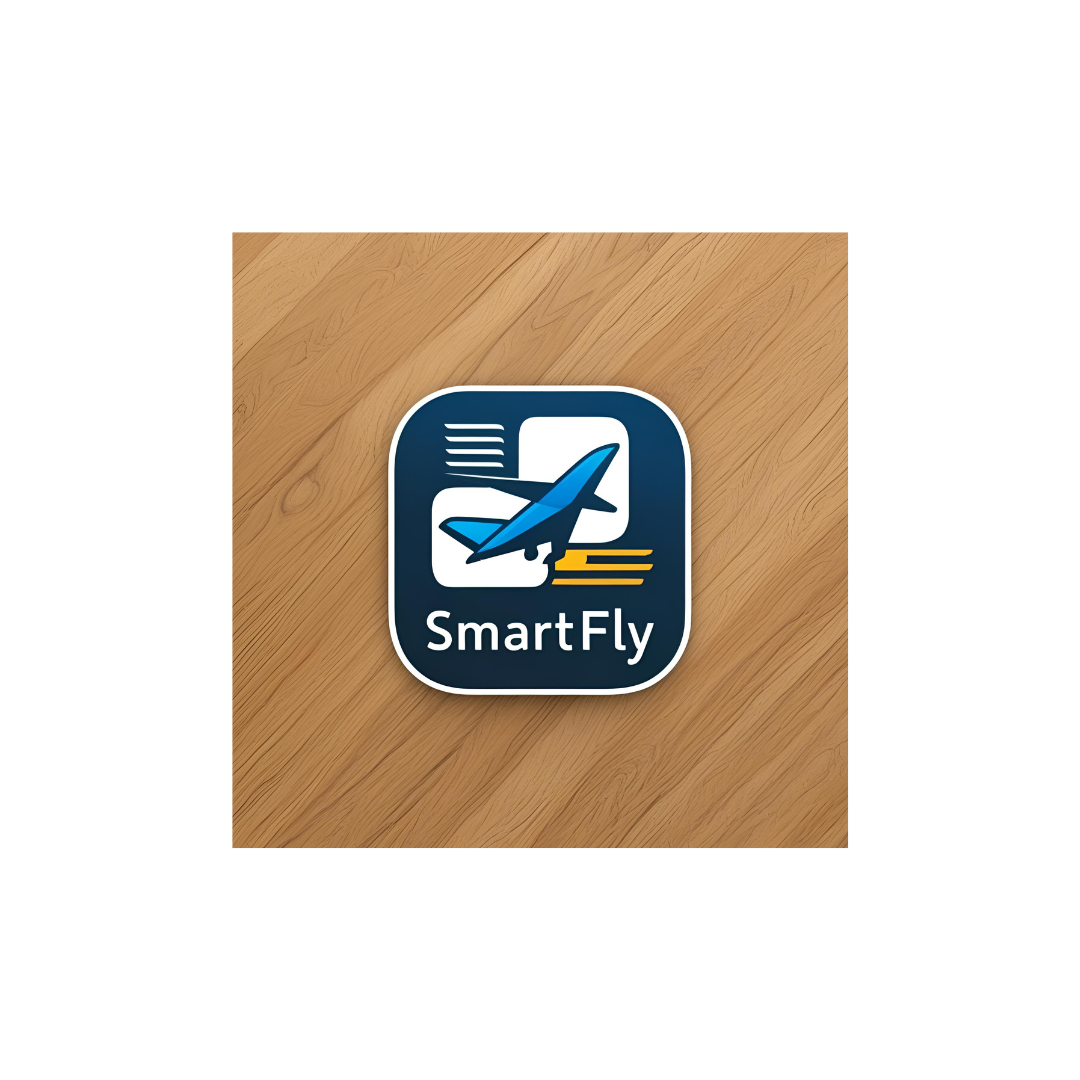







### **Overview**

SmartFly is an advanced flight and airport analytics Agentic AI application that is designed to simplify air travel by leveraging the functionalities of ArangoDB, NetworkX and Nvidia acceleration.
This application makes use of GraphRAG approach to enhance decision-making for travelers. Be it looking for the best routes, connectivity insights or flight and airport queries, smartFly is your one-stop solution for all your queries.

### **What can be Expected from smartFly?**
- **Flight and Airport Queries** - This application is designed to assist the user with flight and airport-related queries by retrieving airport and flight data effotlessly.
- **Shortest Path Analysis** - Identify the most efficient flight routes between destinations.
- **Network Connectivity Analysis** - The application analyzes airline networks to enhance travel planning and logistics.

### **What's New?**
While it might be common to find several applications aiming to provide users with the best travel applications, smartFly is designed to simplify air travel by offering a natural, chat-like interface to the user providing insights into airports, flights and network connectivity unlike other traditional flight search applications that provide users with complex filtering and chat interfaces.

The benefits of using smartFly are:
- **Simplicity** - As a end user, When we think about an application, we think about the ease of usage of the application, whilst there are several applications in the market some of them include skyscanner, kayak and many more to get to know about which flight and route could be selected to reach the desired destination, a major limitation is that they come with overwhelming UIs and it is upto the user to be able to find the best route which involves minimum layovers and so on by setting the appropriate filters, there is no concrete intelligence to help the user. SmartFly offers a **simple chat interface** that makes it easy to get flight recommendations, shortest paths, and network insights eliminating the need to navigate through complex menus.
- **Advanced Intelligence** - While ChatGPT and other LLMs can answer general flight related queries, **smartFly**  is specifically designed for aviation analytics and is designed using **GraphRAG (Graph Retrieval-Augmented Generation)** which integrates graph-based retrieval thus preserving contextual relationships between entities and enabling more accurate responses overcoming hallucinations unlike other traditonal approaches.
- **Better Performance** - This application internally makes use of powerful tools from ArangoDB, NetworkX and Nvidia CUGraph acceleration enabling complex network and data analysis.
- **More than Just Booking** – Unlike other applications, which focuses on ticket booking, SmartFly provides deeper insights into airport connectivity, alternative routes, and travel optimizations, helping both passengers and industry professionals make smarter decisions.

### **High Level Architecture**
On a high-level, the smartFly agentic AI app is designed as follows:
- **ArangoDB's Provided Dataset** - This application makes use of ArangoDB's **FLIGHTS** pre-configured dataset optimized for graph analytics and GraphRAG tasks.
- **ArangoGraphQAChain object** - Simple Queries are answered using **ArangoGraphQAChain** object that enables translation of a Natural Language Query into AQL, executes the query, and translates the result back into Natural Language.
- **NetworkXAlgorithm** - Complex Queries are answered by invoking a **NetworkX Algorithm** where a suitable algorithm is selected which then works on the input query which is a natural language, executes the algorithm and translates the results back into natural language.
- **AQL + NetworkX** - Some queries can be hybrid, that combines both simple as well as complex queries in such scenarios , the smartFly application splits the query into simple parts which are executed by AQL and complex parts are executed using the NetworkX algorithm and both the results are combined and an LLM is made use to generate a final response.

- **ArangoSearch** - Additionally ArangoDB comes with multimodal capabilities one such functionality is **ArangoSearch** which has is also explored in this hackathon.

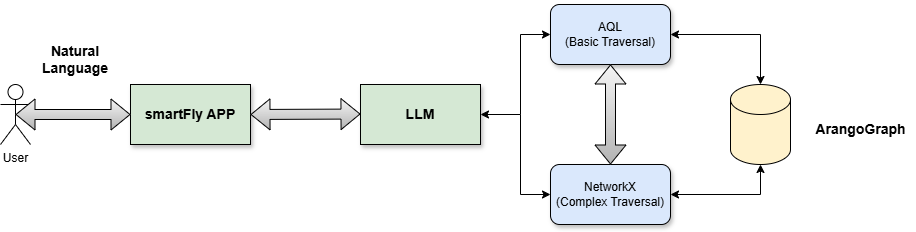


### **Get started with smartFly and elevate your flight experience smartly.**


### Step 0: Package Installation and Setup

In [1]:
import locale

def getpreferredencoding(do_setlocale=True):
    return "UTF-8"

locale.getpreferredencoding = getpreferredencoding

In [2]:
# 1. Install nx-arangodb via pip
# Github: https://github.com/arangodb/nx-arangodb

!pip install nx-arangodb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 85.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 8.3 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4.2
    Uninstalling networkx-3.4.2:
      Successfully uninstalled networkx-3.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which

In [3]:
# 2. Check if you have an NVIDIA GPU
# Note: If this returns "command not found", then GPU-based algorithms via cuGraph are unavailable

!nvidia-smi
!nvcc --version

Sun Mar  9 04:05:47 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   31C    P0             46W /  400W |       0MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [4]:
# 3. Install nx-cugraph via pip
# Note: Only enable this installation if the step above is working!

!pip install nx-cugraph-cu12 --extra-index-url https://pypi.nvidia.com # Requires CUDA-capable GPU

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com


In [5]:
# 4. Install LangChain & LangGraph

!pip install --upgrade langchain langchain-community langchain-openai langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.5/131.5 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.4/415.4 kB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.40
    Uninstalling langchain-core-0.3.40:
      Successfully uninstalled langchain-core-0.3.40
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.19
    Uninstalling langchain-0.3.19:
      Successfully uninstalled langchain-0.3.19


In [6]:
#5. Install the datasets loaded in the ArangoDB
!pip install arango-datasets

In [7]:
# 6. Import the required modules

import networkx as nx
import nx_arangodb as nxadb

from arango import ArangoClient
from arango_datasets import Datasets

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import randint
import re
import json

from langgraph.prebuilt import create_react_agent
from langgraph.checkpoint.memory import MemorySaver
from langchain_openai import ChatOpenAI
from langchain_community.graphs import ArangoGraph
from langchain_community.chains.graph_qa.arangodb import ArangoGraphQAChain
from langchain_core.tools import tool

[04:06:07 +0000] [INFO]: NetworkX-cuGraph is available.
INFO:nx_arangodb:NetworkX-cuGraph is available.


### Step 1, Connect to the ArangoDB database and load the FLIGHTS dataset

In this section, we connect to the ArangoDB database and load the dataset and analyse it

In [8]:
# 1. Connect to the ArangoDB database
# TODO: Configure your credentials here!

db = ArangoClient(hosts="https://51ab851a7096.arangodb.cloud:8529",request_timeout=None).db(username="root", password="HgSj0YAVrmVLIKEQ6pJk", verify=True)

#db = ArangoClient(hosts="https://deb0991c211e.arangodb.cloud:8529", request_timeout=None).db(username="root", password="6vxZBKtcahWwMq6AHjDx", verify=True)

print(db)

<StandardDatabase _system>


In [9]:
# 2. Connecting to datasets
datasets = Datasets(db)

Output()

In [10]:
# 3. Analyze the Flight graph dataset
print(datasets.dataset_info("FLIGHTS"))

{'files': 2, 'edges': [{'collection_name': 'flights', 'files': ['https://arangodb-dataset-library.s3.amazonaws.com/flights_dataset/edges/flights.json']}], 'vertices': [{'collection_name': 'airports', 'files': ['https://arangodb-dataset-library.s3.amazonaws.com/flights_dataset/vertices/airports.json']}], 'file_type': 'json', 'label': 'FLIGHTS', 'edge_definitions': [{'edge_collection': 'flights', 'from_vertex_collections': ['airports'], 'to_vertex_collections': ['airports']}]}


In [11]:
# 4. Verify if the DB has the Flights dataset loaded
print(db.has_graph("FLIGHTS"))

True


In [12]:
# 5. Delete the dataset on ArangoDB if not needed
# db.delete_graph("FLIGHTS", drop_collections=True)

In [13]:
# 6. Load the Graph dataset on the ArangoDB if not already present
if db.has_graph("FLIGHTS") == False:
  datasets.load("FLIGHTS")

In [14]:
# 7. Verify if the DB has the Flights dataset loaded
print(db.has_graph("FLIGHTS"))

True


### Step 2, Analyze the Graph using different techniques

There are 4 Graph Types in NetworkX namely:
1. Unidirected graph.
2. Directed graph.
3. Multiple unidirected graph.
4. Multiple directed graph.

In this section, the FLIGHTS graph that we use is a unidirected graph.

In [15]:
# 1. Plot the Graph using graphistry
!pip install graphistry


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.2/290.2 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 21.3 MB/s eta 0:00:00


In [16]:
import graphistry

In [17]:
# 2. Fetch the graph
graph = db.graph('FLIGHTS')

In [18]:
graphistry.register(
    api=3,
    personal_key_id="7GQTQHDE68",
    personal_key_secret="89603AUEOX0UH0IF"
)

In [19]:
# 3. Function to convert ArangoDB graph to Graphistry format
def graph_to_graphistry(graph, source='_from', destination='_to', node='_id'):
    nodes_df = pd.DataFrame()
    for vc_name in graph.vertex_collections():
        nodes_df = pd.concat([nodes_df, pd.DataFrame([x for x in graph.vertex_collection(vc_name)])], ignore_index=True)

    edges_df = pd.DataFrame()
    for edge_def in graph.edge_definitions():
        edges_df = pd.concat([edges_df, pd.DataFrame([x for x in graph.edge_collection(edge_def['edge_collection'])])], ignore_index=True)

    return graphistry.bind(source=source, destination=destination, node=node).nodes(nodes_df).edges(edges_df)

In [20]:
# 4. Convert and visualize the Full graph
g = graph_to_graphistry(graph)
g.plot()

In [21]:
# 5. Import NetworkX libraries to plot different Graph Types
import networkx as nx

In [22]:
# 6. Get Nodes and Edges
nodes = set()
edges = []
cursor = db.aql.execute('FOR edge IN flights RETURN edge')

In [23]:
#for edge in graph.edge_collection('flights').all():
for edge in cursor:
    from_node = edge['_from'].split('/')[1]  # Extracting the key from the full path
    to_node = edge['_to'].split('/')[1]
    nodes.add(from_node)
    nodes.add(to_node)
    edges.append((from_node, to_node))

In [24]:
#8.  Visualize a undirected graph
G = nx.Graph()  # undirected graph
G.add_nodes_from(nodes)
G.add_edges_from(edges)

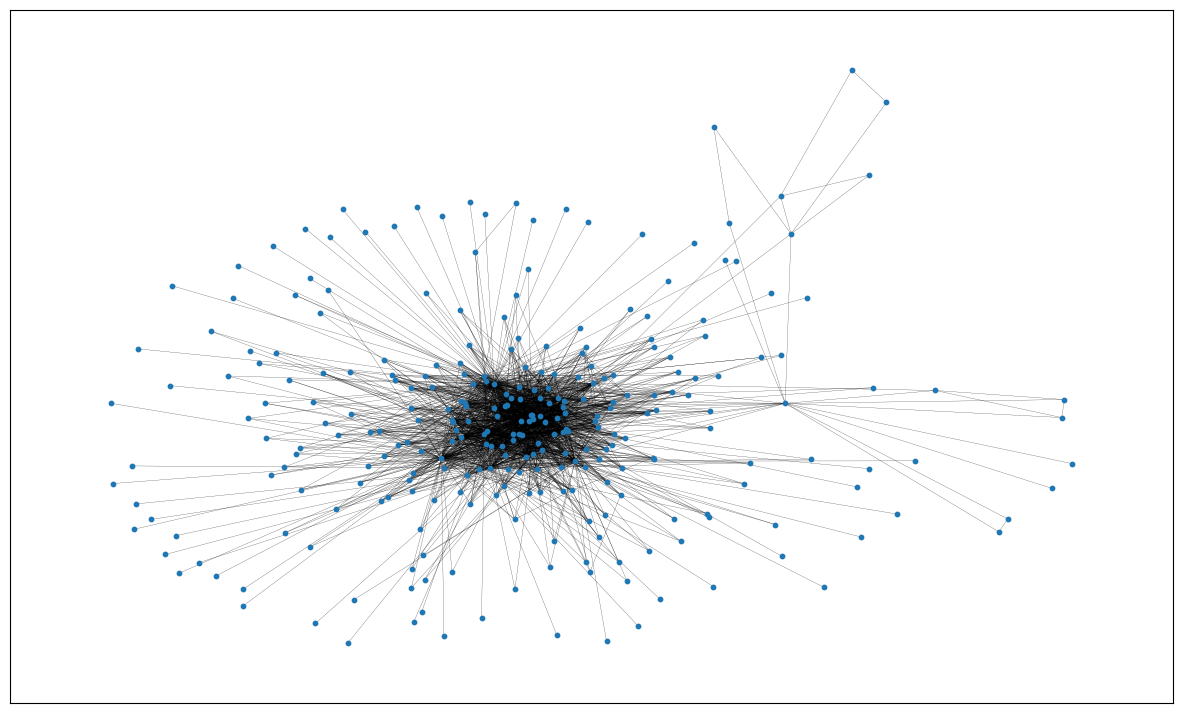

In [25]:
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)

### Step 3: Build the smartFly Agentic App with Langchain and LangGraph

This section will provide detailed explanation on how to dynamically select AQL vs. NetworkX/cuGraph execution paths based on user input. We mainly focus on the hybrid model implementation that combines both AQL and NetworkX. ArangoSearch approach has also been implemented.

Reference:
- https://www.langchain.com/
- https://www.langchain.com/langgraph

In [26]:
# 1. Re-connect to the same Graph

G_adb = nxadb.Graph(name="FLIGHTS", db=db)

print(G_adb)

[04:06:52 +0000] [INFO]: Graph 'FLIGHTS' exists.INFO:nx_arangodb:Graph 'FLIGHTS' exists.[04:06:52 +0000] [INFO]: Default node type set to 'airports'INFO:nx_arangodb:Default node type set to 'airports'

Graph named 'FLIGHTS' with 3375 nodes and 286463 edges


In [27]:
print(type(G_adb))

<class 'nx_arangodb.classes.graph.Graph'>


In [28]:
# Verify the type of graph
if isinstance(G_adb, nx.MultiGraph):
    print("G_adb is an undirected MultiGraph.")
elif isinstance(G_adb, nx.MultiDiGraph):
    print("G_adb is a directed MultiGraph.")
elif isinstance(G_adb, nx.Graph):
    print("G_adb is a simple undirected graph.")
elif isinstance(G_adb, nx.DiGraph):
    print("G_adb is a simple directed graph.")
else:
    print("Unknown graph type.")

G_adb is a simple undirected graph.


In [29]:
# 2. Create the ArangoGraph LangChain wrapper
# Reference: https://api.python.langchain.com/en/latest/graphs/langchain_community.graphs.arangodb_graph.ArangoGraph.html

arango_graph = ArangoGraph(db)

In [30]:
# 3. Print the FLIGHTS Graph schema

print(arango_graph.schema)

{'Graph Schema': [{'graph_name': 'FLIGHTS', 'edge_definitions': [{'edge_collection': 'flights', 'from_vertex_collections': ['airports'], 'to_vertex_collections': ['airports']}]}], 'Collection Schema': [{'collection_name': 'flights', 'collection_type': 'edge', 'edge_properties': [{'name': '_key', 'type': 'str'}, {'name': '_id', 'type': 'str'}, {'name': '_from', 'type': 'str'}, {'name': '_to', 'type': 'str'}, {'name': '_rev', 'type': 'str'}, {'name': 'Year', 'type': 'int'}, {'name': 'Month', 'type': 'int'}, {'name': 'Day', 'type': 'int'}, {'name': 'DayOfWeek', 'type': 'int'}, {'name': 'DepTime', 'type': 'int'}, {'name': 'ArrTime', 'type': 'int'}, {'name': 'DepTimeUTC', 'type': 'str'}, {'name': 'ArrTimeUTC', 'type': 'str'}, {'name': 'UniqueCarrier', 'type': 'str'}, {'name': 'FlightNum', 'type': 'int'}, {'name': 'TailNum', 'type': 'str'}, {'name': 'Distance', 'type': 'int'}], 'example_edge': {'_key': '306520629', '_id': 'flights/306520629', '_from': 'airports/ATL', '_to': 'airports/CHS', '

In [31]:
# 4. Execute a sample AQL query to find the busiest airport in USA (Just for reference not a core requirement for the app development)
result = arango_graph.db.aql.execute("""
    FOR airport IN airports
        FILTER airport.country == 'USA'  // Filtering only USA airports
        LET totalFlights = COUNT(
            FOR flight IN flights
                FILTER flight._from == airport._id
                RETURN flight
        )
    SORT totalFlights DESC
    LIMIT 1
    RETURN { name: airport.name, country: airport.country, flights: totalFlights }
""")

# Convert the cursor to a list to get the results
busiest_airport = list(result)

# Print the result (the list of the busiest airport in the USA)
print("Busiest Airport in the USA:", busiest_airport)



Busiest Airport in the USA: [{'name': 'William B Hartsfield-Atlanta Intl', 'country': 'USA', 'flights': 15887}]


In [32]:
# 5. Execute yet another AQL query to find out the airport with the most international flights
result_international_flights = arango_graph.db.aql.execute("""
FOR airport IN airports
    LET internationalFlights = COUNT(
        FOR flight IN flights
            FILTER flight._from == airport._id AND flight.to_country != 'USA'
            RETURN flight
    )
    FILTER internationalFlights > 0
    SORT internationalFlights DESC
    LIMIT 5
    RETURN { name: airport.name, country: airport.country, international_flights: internationalFlights }
""")

international_flights_airports = list(result_international_flights)
print("Airports with the Most International Flights:", international_flights_airports)



Airports with the Most International Flights: [{'name': 'William B Hartsfield-Atlanta Intl', 'country': 'USA', 'international_flights': 15887}, {'name': "Chicago O'Hare International", 'country': 'USA', 'international_flights': 13688}, {'name': 'Dallas-Fort Worth International', 'country': 'USA', 'international_flights': 11381}, {'name': 'Denver Intl', 'country': 'USA', 'international_flights': 9377}, {'name': 'Los Angeles International', 'country': 'USA', 'international_flights': 9079}]


In [33]:
# 6. Import the secret keys needed to implement the smartFly Agentic AI app.
import os
from google.colab import userdata
os.environ["OPENAI_API_KEY"] = userdata.get('API_KEY')
os.environ["LANGSMITH_API_KEY"] = userdata.get('LANGSMITH_API_KEY')

In [34]:
# 7. Introduction to the smartFly application

@tool
def welcome_message(query: str):
    "Friendly, welcome message to the user of the smartFly application."

    return "Welcome to the smartFly application! How can I assist you today?"

In [35]:
# 8. Define the functionality of the smartFly application

@tool
def app_info(query: str):
    """ This app is useful for demonstrating flight and airport related queries, shortest path analysis, and network connectivity. This function is to be called
        only when the user asks questions related to the functionality of this application not otherwise."""

    llm = ChatOpenAI(temperature=0, model_name="gpt-4o")

    prompt = f"You are a smartFly application, a helpful assistant for all Flight related queries. The user asked: '{query}'. Respond with a brief introduction of what this application does."

    result = llm.invoke(query)

    return result.content if hasattr(result, "content") else str(result)


In [36]:
# 9. Define the Text to AQL Tool

@tool
def text_to_aql_to_txt(query: str):
    """This tool is available to answer simple queries by invoking the
    ArangoGraphQAChain object, which enables you to
    translate a Natural Language Query into AQL, execute the query, and translate the result back into Natural Language.

    If the query involves complex, hybrid (simple + complex), full text-based search then do not use this tool.
    It the query involves full-text search (e.g., matching phrases or keywords) then do not use this tool, instead use text_to_arangosearch_aql_to_txt tool.
    """

    llm = ChatOpenAI(temperature=0, model_name="gpt-4o")

    chain = ArangoGraphQAChain.from_llm(
    	llm=llm,
    	graph=arango_graph,
    	verbose=True,
      allow_dangerous_requests=True,
      return_intermediate_steps=True
    )

    print(f"Received query: {query}")  # This should print the query passed to the tool

    # Run the query
    try:
        result = chain.invoke(query)
        print(f"Generated result: {result}")  # To see the output from the chain
    except Exception as e:
        print(f"Error during query execution: {e}")
        result = "There was an issue processing the query."

    return result


In [37]:
# 10. Define the Text to NetworkX/cuGraph Tool

@tool
def text_to_nx_algorithm_to_text(query):
    """This tool is available to invoke a NetworkX Algorithm on
    the ArangoDB Graph. You are responsible for accepting the
    Natural Language Query, establishing which algorithm needs to
    be executed, executing the algorithm, and translating the results back
    to Natural Language, with respect to the original query.

    This tool is answer queries such as (e.g traversals, shortest path, etc.) .

    When the query involves hybrid queries (e.g busiest airports and shortest path, etc) then do not use this tool.
    """

    llm = ChatOpenAI(temperature=0, model_name="gpt-4o")

    ######################
    print("1) Generating NetworkX code")

    text_to_nx = llm.invoke(f"""
    I have a NetworkX Graph called `G_adb`. It has the following schema: {arango_graph.schema}

    I have the following graph analysis query: {query}.

    Generate the Python Code required to answer the query using the `G_adb` object.

    Be very precise on the NetworkX algorithm you select to answer this query. Think step by step.

    Only assume that networkx is installed, and other base python dependencies.

    Always set the last variable as `FINAL_RESULT`, which represents the answer to the original query.

    Only provide python code that I can directly execute via `exec()`. Do not provide any instructions.

    Make sure that `FINAL_RESULT` stores a short & consice answer. Avoid setting this variable to a long sequence.

    Your code:
    """).content

    text_to_nx_cleaned = re.sub(r"^```python\n|```$", "", text_to_nx, flags=re.MULTILINE).strip()

    print('-'*10)
    print(text_to_nx_cleaned)
    print('-'*10)

    ######################

    print("\n2) Executing NetworkX code")
    global_vars = {"G_adb": G_adb, "nx": nx}
    local_vars = {}

    try:
        exec(text_to_nx_cleaned, global_vars, local_vars)
        text_to_nx_final = text_to_nx
    except Exception as e:
        print(f"EXEC ERROR: {e}")
        return f"EXEC ERROR: {e}"

    print('-'*10)
    FINAL_RESULT = local_vars["FINAL_RESULT"]
    print(f"FINAL_RESULT: {FINAL_RESULT}")
    print('-'*10)

    ######################

    print("3) Formulating final answer")

    nx_to_text = llm.invoke(f"""
        I have a NetworkX Graph called `G_adb`. It has the following schema: {arango_graph.schema}

        I have the following graph analysis query: {query}.

        I have executed the following python code to help me answer my query:

        ---
        {text_to_nx_final}
        ---

        The `FINAL_RESULT` variable is set to the following: {FINAL_RESULT}.

        Based on my original Query and FINAL_RESULT, generate a short and concise response to
        answer my query.

        Your response:
    """).content

    return nx_to_text

In [38]:
# 11. An experimental, Text to NetworkX/cuGraph Tool (Just a different way of implementing the NetworkX, but this method is not efficient)
@tool
def experimental_text_to_nx_algorithm_to_text(query):
    """This tool invokes a NetworkX Algorithm on the ArangoDB Graph.
    If the query (e.g traversals, shortest path, etc.) can be solved using the Arango Query Language, then do not use
    this tool.
    """

    llm = ChatOpenAI(temperature=0, model_name="gpt-4o")


    # Extract and print only the algorithm used
    nx_algorithm = llm.invoke(f"""
    I have a NetworkX Graph called  'G_adb'. It has the following schema: {arango_graph.schema}

    Given this query: {query}, what is the most suitable NetworkX algorithm required to answer the query.

    Be very precise on the NetworkX algorithm you select. Think step by step.

    Reply ONLY with the algorithm name and a one-line description.
    """).content

    #Print the NetworkX algorithm that was used to process the query
    print("Selected NetworkX Algorithm:", nx_algorithm)

    result = llm.invoke(f"""
    I have a NetworkX Graph called `G_adb`. It has the following schema: {arango_graph.schema}

    I have the following graph analysis query: {query}.

    Based on my original Query: {query}, generate a short and concise response to
    answer my query in Natural Language. Use the NetworkX Graph 'G_adb' and {nx_algorithm} to answer the query.

    Your response must be in natural language, **concise, and free of technical details**.
    Do NOT include any code or mention any algorithm name in the final response.

    The response should feel like a direct answer to the original query.

    Your response:
    """).content

    return result


In [39]:
# 12. Define an Hybrid tool, that leverages the functionalities of both text to AQL and Text to NetworkX/CuGraph tools.
@tool
def text_to_hybrid_to_text(query):
    """
    This tool is used to handle hybrid queries. Hybrid queries are queries that involve both simple and complex data retrieval.

    The tool processes complex graph (hybrid) queries by combining ArangoGraphQAChain and NetworkX.

    - **AQL (Structured Queries):** Handles simple data retrieval (e.g., airport details, flight counts, etc.).
    - **NetworkX (Graph Algorithms):** Solves complex graph problems (e.g., shortest path, best routes, etc.).

    It first breaks down the query, processes each part with the appropriate method, and then combines the results into a clear, concise response.
    """

    #Step1: Seperate the query into simple and complex
    llm = ChatOpenAI(temperature=0, model_name="gpt-4o")

    prompt = f"""
      I have the following graph analysis query: {query}.
        - Identify which part of the query should be answered using **ArangoGraphQAChain**. The parts of the query that involves **retrieving specific data**
          such as (Finding the busiest airports, counting flights, airports, etc).
        - Identify which part of the query should be answered using **NetworkX**. The parts of the query that involves **finding the shortest path, best path, etc**.
        - If both are needed, clearly **separate** them.
        - Return your response in a **JSON format**:
        {{
          "AQL_part": "...",
          "NetworkX_part": "..."
        }}
      """
    query_parts = llm.invoke(prompt).content.strip()

    query_parts = re.sub(r"^```json\n|```$", "", query_parts, flags=re.MULTILINE).strip()

    try:
      query_parts = json.loads(query_parts)
    except json.JSONDecodeError as e:
      print(f" JSON Parsing Error: {e}")
      return "Failed to parse query decomposition response."

    #query_parts = json.loads(query_parts)

    print('-'*10)
    print(query_parts)
    print('-'*10)

    aql_part = query_parts.get("AQL_part", "")
    networkx_part = query_parts.get("NetworkX_part", "")

    aql_result = ""
    networkx_result = ""


    #Step2, Using a ArangoGraphQAChain object to translate Natural language to AQL, executing it and translating it back into Natural language (that is answer the simple query using AQL)
    if aql_part:
        print("AQL Part:", aql_part)
        chain = ArangoGraphQAChain.from_llm(
    	    llm=llm,
    	    graph=arango_graph,
    	    verbose=True,
          allow_dangerous_requests=True,
          return_intermediate_steps=True
        )

        try:
            aql_result = chain.invoke(aql_part)
            print(f"Generated result: {aql_result}")
        except Exception as e:
            print(f"Error during query execution: {e}")
            aql_result = "There was an issue processing the query."


    #Step3, Using a NetworkX algorithm to handle the complex part of the query.
    if networkx_part:
        print("NetworkX Part:", networkx_part)

        ######################
        print(f"Generated result: {aql_result}")  # To see the output from the chain

        print("1) Generating NetworkX code")

        text_to_nx = llm.invoke(f"""
        I have a NetworkX Graph called `G_adb`. It has the following schema: {arango_graph.schema}

        I have the following graph analysis query: {networkx_part}.

        And I have the following AQL Result: {aql_result}.

        Generate the Python Code required to answer the query using the `G_adb` object.

        Be very precise on the NetworkX algorithm you select to answer this query. Think step by step.

        Only  assume that networkx is installed, and other base python dependencies.

        Always set the last variable as `FINAL_RESULT`, which represents the answer to the original query.

        Only provide python code that I can directly execute via `exec()`. Do not provide any instructions.

        Make sure that `FINAL_RESULT` stores a short & consice answer.

        Your code:
        """).content

        text_to_nx_cleaned = re.sub(r"^```python\n|```$", "", text_to_nx, flags=re.MULTILINE).strip()

        print('-'*10)
        print(text_to_nx_cleaned)
        print('-'*10)

      ###########################

    #step3, Execute the NetworkX code

        print("\n2) Executing NetworkX code")
        global_vars = {"G_adb": G_adb, "nx": nx}
        local_vars = {}

        try:
            exec(text_to_nx_cleaned, global_vars, local_vars)
            text_to_nx_final = text_to_nx
            networkx_result = local_vars.get("FINAL_RESULT", "No valid result from NetworkX.")
        except Exception as e:
            print(f"NetworkX Execution Error: {e}")
            networkx_result = f"Execution failed: {str(e)}"

        print('-'*10)
        networkx_result = local_vars["FINAL_RESULT"]
        print(f"FINAL_RESULT: {networkx_result}")
        print('-'*10)

      ###########################

  #Step4: Combine AQL and NetworkX results and generate the final response.

    print("3) Formulating final answer")
    final_answer = llm.invoke(f"""
      - I have a NetworkX Graph called 'G_adb'. It has the following schema: {arango_graph.schema}
      - I have the following query: {query}.
      - I have the following **AQL Result:** {aql_result}
      - I have the **NetworkX Result:** {networkx_result}

      Based on these results, generate a short and clear answer to the original query.
      """).content

    return final_answer


In [40]:
# 13. ArangoDB supports Multimodality and one of it is the ArangoSearch, which is a full-text based search
# Reference: https://docs.arangodb.com/3.10/index-and-search/arangosearch/

@tool
def text_to_arangosearch_aql_to_txt(query: str):
    """
    This tool translates natural language queries into AQL, executes them in ArangoDB,
    by invoking the ArangoGraphQAChain object, and then translates the results back
    into natural language. It is specifically designed for full-text search
    using ArangoSearch, making it efficient for retrieving information based on text-based criteria.

    Features:
    - Converts natural language queries into optimized AQL queries.
    - Utilizes ArangoSearch for advanced text-based searches.
    - Supports ranking results using BM25() and TFIDF().
    - Handles exact phrase matching with PHRASE().
    - Executes queries against the "arangoSearchView" index for enhanced performance.

    Suitable Use Cases:
    - Searching for flights by airline name, flight number, or status.
    - Retrieving airport information based on city, state, or VIP status.
    - Finding delayed or on-time flights ranked by relevance.

    Do not use this tool for complex hybrid queries that combine structured and unstructured data.
    """

    llm = ChatOpenAI(temperature=0, model_name="gpt-4o")

    arangosearch_instructions = """
    Use ArangoSearch for text-based queries:
    1. Use SEARCH instead of FILTER for text queries.
    2. Apply ANALYZER() with "text_en" for text fields.
    3. Use PHRASE() for exact phrase matching.
    4. Utilize BM25() or TFIDF() for ranking.
    5. Query the arangoSearchView for search operations.
    """

    arangosearch_examples = [
        ("Find flights by Frontier Airlines (FL)",
         """
         FOR flight IN arangoSearchView
           SEARCH ANALYZER(flight.UniqueCarrier == "FL", "text_en")
           SORT BM25(flight) DESC
           RETURN flight
         """),
        ("Find all VIP airports in the USA",
         """
         FOR airport IN arangoSearchView
           SEARCH ANALYZER(airport.vip == true AND airport.country == "USA", "text_en")
           RETURN airport
         """),
        ("Find flights departing from Atlanta (ATL)",
         """
         FOR flight IN arangoSearchView
           SEARCH ANALYZER(flight._from == "airports/ATL", "text_en")
           RETURN flight
         """),
        ("Find flights arriving at Chicago (ORD) sorted by arrival time",
         """
         FOR flight IN arangoSearchView
           SEARCH ANALYZER(flight._to == "airports/ORD", "text_en")
           SORT flight.ArrTime ASC
           RETURN flight
         """),
    ]

    chain = ArangoGraphQAChain.from_llm(
        llm=llm,
        graph=arango_graph,
        verbose=True,
        allow_dangerous_requests=True,
        return_intermediate_steps=True,
        search_view="arangoSearchView", # Set the arongSearchView in the ArangdoDB and link with the collections
        aql_instructions=arangosearch_instructions,
        examples=arangosearch_examples
    )

    try:
        result = chain.invoke(query)
        print(f"Generated result: {result}")
    except Exception as e:
        print(f"Error during query execution: {e}")
        result = "There was an issue processing the query."

    return result


In [41]:
# 14. Calling the tools using the create_tool_calling_agent which was more effective in this application.

from langchain_openai import ChatOpenAI
from langchain.agents import AgentExecutor, create_tool_calling_agent
from langchain import hub


def query_graph(query):
    llm = ChatOpenAI(temperature=0, model_name="gpt-4o")

    tools = [welcome_message, app_info, text_to_aql_to_txt, text_to_nx_algorithm_to_text, text_to_hybrid_to_text, text_to_arangosearch_aql_to_txt]
    #tools = [welcome_message, app_info, text_to_hybrid_to_text]
    prompt = hub.pull("hwchase17/openai-tools-agent")
    agent = create_tool_calling_agent(llm, tools, prompt)

    agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

    result = agent_executor.invoke({"input": query})

    return result["output"]


In [42]:
# 15. Experiment with example queries
# Note: Some may work, some may not!

#Initial interaction with the application
query = "Hello!"
query = "What is the use of this application?"
query = "What is smartFly about?"
query = "What is smartFly?"

#Simple Queries
query = "Which is the busiest airport by passengers?"
query = "Which is the busiest airport by flights?"
query = "List all the airports in USA"
query = "Which airport has the most outgoing flights?"
query = "Which airport has the most incoming flights?"
query = "Which flight route has the least traffic?"

#Complex Queries
query = "What is the shortest route from JFX to LAX?"
query = "Which airport is the most important hub?"
query = "Which airports can be reached from JFX with at most 2 layovers?"
query = "What are the clusters of airports with strong connectivity?"
query = "What is the shortest path from JFX to LAX?"
query = "How can I travel , from JFK to HNL?"

#Hybrid Queries
query = "Which is the busiest airport in USA and what is the shortest route from that airport to HNL?"
query = "Which is the best route from JFK to the most popular destination in USA?"
query = "Which airport in the USA has direct flights to the most destinations, and what is its betweenness centrality in the global network?"
query = "Which is the least busiest airport in USA and what is the best route from that airport to HNL?"

#Arangosearch specific Queries
query = "Which airports are located in California, (state = 'CA'?)"
query = "Find flights with FlightNum 579."
query = "Find flights departing from Atlanta (ATL)"
query = "Find flights arriving at Chicago (ORD) sorted by arrival time"
query = "Find flights departing after 8 PM from San Francisco (SFO)."

In [43]:
query_graph("Hi!")



> Entering new AgentExecutor chain...

Invoking: `welcome_message` with `{'query': 'Hi!'}`


Welcome to the smartFly application! How can I assist you today?Welcome to the smartFly application! How can I assist you today?

> Finished chain.


'Welcome to the smartFly application! How can I assist you today?'

In [44]:
query_graph("What is the use of this application?")



> Entering new AgentExecutor chain...

Invoking: `app_info` with `{'query': 'What is the use of this application?'}`


I'm here to assist with a wide range of inquiries, such as answering questions, providing explanations, offering advice, and helping with problem-solving across various topics. If you have a specific application in mind, please provide more details so I can give a more tailored response.This application is designed to assist with flight and airport-related queries, perform shortest path analysis, and analyze network connectivity. It can answer questions related to flights, airports, and routes, and is particularly useful for exploring complex graph-based queries and network analysis. If you have specific questions or need assistance with these topics, feel free to ask!

> Finished chain.


'This application is designed to assist with flight and airport-related queries, perform shortest path analysis, and analyze network connectivity. It can answer questions related to flights, airports, and routes, and is particularly useful for exploring complex graph-based queries and network analysis. If you have specific questions or need assistance with these topics, feel free to ask!'

In [45]:
query_graph("Busiest Airport in usa")



> Entering new AgentExecutor chain...

Invoking: `text_to_aql_to_txt` with `{'query': 'Busiest Airport in USA'}`


Received query: Busiest Airport in USA


> Entering new ArangoGraphQAChain chain...
AQL Query (1):
WITH airports, flights
FOR airport IN airports
    FILTER airport.country == "USA"
    LET totalFlights = LENGTH(
        FOR flight IN flights
            FILTER flight._from == airport._id OR flight._to == airport._id
            RETURN flight
    )
    SORT totalFlights DESC
    LIMIT 1
    RETURN { airport: airport.name, totalFlights }

AQL Result:
[{'airport': 'William B Hartsfield-Atlanta Intl', 'totalFlights': 32105}]

> Finished chain.
Generated result: {'query': 'Busiest Airport in USA', 'result': 'The busiest airport in the USA, based on the number of flights, is William B Hartsfield-Atlanta International Airport, with a total of 32,105 flights.'}
{'query': 'Busiest Airport in USA', 'result': 'The busiest airport in the USA, based on the number of flights, is Will

'The busiest airport in the USA, based on the number of flights, is William B Hartsfield-Atlanta International Airport, with a total of 32,105 flights.'

In [46]:
query_graph("What is the best route from OGG to HNL?")



> Entering new AgentExecutor chain...

Invoking: `text_to_nx_algorithm_to_text` with `{'query': 'best route from OGG to HNL'}`


1) Generating NetworkX code
----------
import networkx as nx

# Assuming G_adb is already defined and is a NetworkX DiGraph
# We will use Dijkstra's algorithm to find the shortest path based on distance

# Define the source and target airports
source_airport = 'airports/OGG'
target_airport = 'airports/HNL'

# Use Dijkstra's algorithm to find the shortest path based on the 'Distance' attribute
try:
    shortest_path = nx.dijkstra_path(G_adb, source=source_airport, target=target_airport, weight='Distance')
    FINAL_RESULT = shortest_path
except nx.NetworkXNoPath:
    FINAL_RESULT = "No path found from OGG to HNL."
except nx.NodeNotFound as e:
    FINAL_RESULT = str(e)
----------

2) Executing NetworkX code


[04:07:21 +0000] [INFO]: Graph 'FLIGHTS' load took 5.388360977172852sINFO:nx_arangodb:Graph 'FLIGHTS' load took 5.388360977172852s[04:07:24 +0000] [INFO]: NXCG Graph construction took 2.1841542720794678sINFO:nx_arangodb:NXCG Graph construction took 2.1841542720794678s

----------
FINAL_RESULT: ['airports/OGG', 'airports/HNL']
----------
3) Formulating final answer
The best route from OGG to HNL is a direct flight.The best route from OGG (Kahului Airport) to HNL (Honolulu International Airport) is a direct flight.

> Finished chain.


'The best route from OGG (Kahului Airport) to HNL (Honolulu International Airport) is a direct flight.'

In [47]:
query_graph("How can I travel , from JFK to HNL")



> Entering new AgentExecutor chain...

Invoking: `text_to_nx_algorithm_to_text` with `{'query': 'Find the best travel route from JFK (John F. Kennedy International Airport) to HNL (Daniel K. Inouye International Airport)'}`


1) Generating NetworkX code
----------
import networkx as nx

# Assuming G_adb is already defined and is a NetworkX graph object

# Step 1: Define the source and target nodes
source = 'airports/JFK'
target = 'airports/HNL'

# Step 2: Use Dijkstra's algorithm to find the shortest path based on distance
# We assume that the 'Distance' attribute is used as the weight for the edges
try:
    shortest_path = nx.dijkstra_path(G_adb, source=source, target=target, weight='Distance')
    FINAL_RESULT = shortest_path
except nx.NetworkXNoPath:
    FINAL_RESULT = "No path found from JFK to HNL."
except nx.NodeNotFound as e:
    FINAL_RESULT = str(e)
----------

2) Executing NetworkX code
----------
FINAL_RESULT: ['airports/JFK', 'airports/DEN', 'airports/HNL']
----------
3) 

'The best travel route from John F. Kennedy International Airport (JFK) to Daniel K. Inouye International Airport (HNL) is via Denver International Airport (DEN).'

In [48]:
query_graph("Which is the busiest airport in USA and what is the shortest route from that airport to HNL?")



> Entering new AgentExecutor chain...

Invoking: `text_to_hybrid_to_text` with `{'query': 'Find the busiest airport in the USA and determine the shortest route from that airport to HNL (Honolulu International Airport).'}`


----------
{'AQL_part': 'Find the busiest airport in the USA by retrieving specific data such as the number of flights or passengers handled by each airport.', 'NetworkX_part': 'Determine the shortest route from the busiest airport to HNL (Honolulu International Airport) using graph algorithms.'}
----------
AQL Part: Find the busiest airport in the USA by retrieving specific data such as the number of flights or passengers handled by each airport.


> Entering new ArangoGraphQAChain chain...
AQL Query (1):
WITH flights, airports
FOR airport IN airports
    FILTER airport.country == "USA"
    LET flightCount = LENGTH(
        FOR flight IN flights
            FILTER flight._from == airport._id OR flight._to == airport._id
            RETURN flight
    )
    SORT fl

'The busiest airport in the USA is William B Hartsfield-Atlanta International Airport (ATL) in Atlanta, Georgia, with a total of 32,105 flights. However, the shortest route from ATL to Honolulu International Airport (HNL) cannot be determined with the current data, as either ATL or HNL is not present in the graph.'

In [49]:
query_graph("Which airport in the USA has direct flights to the most destinations, and what is its betweenness centrality in the global network?")



> Entering new AgentExecutor chain...

Invoking: `text_to_hybrid_to_text` with `{'query': 'Find the airport in the USA with direct flights to the most destinations and calculate its betweenness centrality in the global network.'}`


----------
{'AQL_part': 'Find the airport in the USA with direct flights to the most destinations. This involves retrieving specific data about airports and their direct connections.', 'NetworkX_part': 'Calculate the betweenness centrality of the identified airport in the global network. This involves finding shortest paths and analyzing the network structure.'}
----------
AQL Part: Find the airport in the USA with direct flights to the most destinations. This involves retrieving specific data about airports and their direct connections.


> Entering new ArangoGraphQAChain chain...
AQL Query (1):
WITH airports, flights
FOR airport IN airports
    FILTER airport.country == "USA"
    LET destinations = (
        FOR flight IN flights
            FILTER flig

'The airport in the USA with direct flights to the most destinations is William B Hartsfield-Atlanta International Airport in Atlanta, Georgia, with direct connections to 166 different destinations. It also has the highest betweenness centrality in the global network, highlighting its crucial role in connecting various destinations.'

In [51]:
query_graph("Which is the best route from JFK to the most popular destination in USA?")



> Entering new AgentExecutor chain...

Invoking: `text_to_hybrid_to_text` with `{'query': 'best route from JFK to the most popular destination in USA'}`


----------
{'AQL_part': 'Identify the most popular destination in the USA by retrieving data on the number of flights or passengers to each destination from JFK. This involves counting flights or passengers to determine the busiest airport.', 'NetworkX_part': 'Once the most popular destination is identified, use NetworkX to find the best route from JFK to this destination. This involves calculating the shortest or most efficient path based on available flight routes and possibly other factors like distance or time.'}
----------
AQL Part: Identify the most popular destination in the USA by retrieving data on the number of flights or passengers to each destination from JFK. This involves counting flights or passengers to determine the busiest airport.


> Entering new ArangoGraphQAChain chain...
AQL Query (1):
WITH flights, airports


'The best route from JFK to the most popular destination in the USA, which is Los Angeles International Airport (LAX), is a direct flight from JFK to LAX. This route is the shortest based on distance, with LAX being the most popular destination from JFK, having a total of 307 flights.'

In [52]:
query_graph("Which airports can be reached from LAX with at most 2 layovers?")



> Entering new AgentExecutor chain...

Invoking: `text_to_nx_algorithm_to_text` with `{'query': 'Find all airports that can be reached from LAX with at most 2 layovers.'}`


1) Generating NetworkX code
----------
import networkx as nx

# Assuming G_adb is already defined and is a NetworkX DiGraph

# Step 1: Use the single_source_shortest_path_length function to find all nodes reachable from 'LAX'
# with a path length of at most 3 (2 layovers means 3 flights in total)
reachable_airports = nx.single_source_shortest_path_length(G_adb, 'airports/LAX', cutoff=3)

# Step 2: Filter out the airports that are reachable with exactly 3 flights (2 layovers)
reachable_with_2_layovers = [airport for airport, length in reachable_airports.items() if length == 3]

# Step 3: Extract the airport keys from the node identifiers
FINAL_RESULT = [airport.split('/')[1] for airport in reachable_with_2_layovers]
----------

2) Executing NetworkX code
----------
FINAL_RESULT: ['BRW', 'ADQ', 'CDV', 'OME', 'SIT',

'From LAX, you can reach the following airports with at most 2 layovers: BRW, ADQ, CDV, OME, SIT, SCC, OTZ, WRG, PSG, BET, ADK, and YAK.'

In [53]:
query_graph("List flights traveling a distance over 500 miles.")



> Entering new AgentExecutor chain...

Invoking: `text_to_aql_to_txt` with `{'query': 'List flights traveling a distance over 500 miles.'}`


Received query: List flights traveling a distance over 500 miles.


> Entering new ArangoGraphQAChain chain...
AQL Query (1):
WITH flights
FOR flight IN flights
  FILTER flight.Distance > 500
  RETURN flight

AQL Result:
[{'_key': '306520630', '_id': 'flights/306520630', '_from': 'airports/CLE', '_to': 'airports/SAT', '_rev': '_jUtmvoO--_', 'Year': 2008, 'Month': 1, 'Day': 1, 'DayOfWeek': 2, 'DepTime': 3, 'ArrTime': 230, 'DepTimeUTC': '2008-01-01T05:03:00.000Z', 'ArrTimeUTC': '2008-01-01T08:30:00.000Z', 'UniqueCarrier': 'XE', 'FlightNum': 2895, 'TailNum': 'N14158', 'Distance': 1241}, {'_key': '306520632', '_id': 'flights/306520632', '_from': 'airports/JFK', '_to': 'airports/PBI', '_rev': '_jUtmvoS--_', 'Year': 2008, 'Month': 1, 'Day': 1, 'DayOfWeek': 2, 'DepTime': 8, 'ArrTime': 332, 'DepTimeUTC': '2008-01-01T05:08:00.000Z', 'ArrTimeUTC': '2008-

'Here are some examples of flights that traveled a distance of over 500 miles:\n\n1. **Flight XE 2895**: Traveled from Cleveland (CLE) to San Antonio (SAT), covering a distance of 1241 miles.\n2. **Flight B6 859**: Traveled from New York (JFK) to West Palm Beach (PBI), covering a distance of 1028 miles.\n3. **Flight OH 5169**: Traveled from Cincinnati (CVG) to Manchester (MHT), covering a distance of 741 miles.\n4. **Flight UA 9**: Traveled from New York (JFK) to San Francisco (SFO), covering a distance of 2586 miles.\n5. **Flight B6 878**: Traveled from Fort Lauderdale (FLL) to New York (JFK), covering a distance of 1069 miles.\n\nThese flights are part of a larger list, all meeting the criteria of traveling more than 500 miles.'

In [54]:
query_graph("Which airports are located in California, (state = 'CA'?)")



> Entering new AgentExecutor chain...

Invoking: `text_to_aql_to_txt` with `{'query': "airports located in California, state = 'CA'"}`


Received query: airports located in California, state = 'CA'


> Entering new ArangoGraphQAChain chain...
AQL Query (1):
WITH airports
FOR airport IN airports
  FILTER airport.state == 'CA'
  RETURN airport

AQL Result:
[{'_key': '0O3', '_id': 'airports/0O3', '_rev': '_jUtmm3y-_H', 'name': 'Calaveras Co-Maury Rasmussen ', 'city': 'San Andreas', 'state': 'CA', 'country': 'USA', 'lat': 38.14611639, 'long': -120.6481733, 'vip': False}, {'_key': '0O4', '_id': 'airports/0O4', '_rev': '_jUtmm3y-_I', 'name': 'Corning Municipal', 'city': 'Corning', 'state': 'CA', 'country': 'USA', 'lat': 39.94376806, 'long': -122.1713781, 'vip': False}, {'_key': '0O5', '_id': 'airports/0O5', '_rev': '_jUtmm3y-_J', 'name': 'University', 'city': 'Davis', 'state': 'CA', 'country': 'USA', 'lat': 38.53146222, 'long': -121.7864906, 'vip': False}, {'_key': '0Q5', '_id': 'airports/

'The query has successfully retrieved a list of airports located in the state of California. Here are some of the airports:\n\n- **Calaveras Co-Maury Rasmussen** in San Andreas\n- **Corning Municipal** in Corning\n- **University** in Davis\n\nThese airports are all located in California, USA, and none of them are marked as VIP.'

In [55]:
query_graph("Find flights with FlightNum 579.")



> Entering new AgentExecutor chain...

Invoking: `text_to_arangosearch_aql_to_txt` with `{'query': 'Find flights with FlightNum 579'}`




> Entering new ArangoGraphQAChain chain...
AQL Query (1):
WITH flights
FOR flight IN flights
  FILTER flight.FlightNum == 579
  RETURN flight

AQL Result:
[{'_key': '306520629', '_id': 'flights/306520629', '_from': 'airports/ATL', '_to': 'airports/CHS', '_rev': '_jUtmvoO---', 'Year': 2008, 'Month': 1, 'Day': 1, 'DayOfWeek': 2, 'DepTime': 2, 'ArrTime': 57, 'DepTimeUTC': '2008-01-01T05:02:00.000Z', 'ArrTimeUTC': '2008-01-01T05:57:00.000Z', 'UniqueCarrier': 'FL', 'FlightNum': 579, 'TailNum': 'N937AT', 'Distance': 259}, {'_key': '306520704', '_id': 'flights/306520704', '_from': 'airports/LAS', '_to': 'airports/TPA', '_rev': '_jUtmvoS-_H', 'Year': 2008, 'Month': 1, 'Day': 1, 'DayOfWeek': 2, 'DepTime': 22, 'ArrTime': 716, 'DepTimeUTC': '2008-01-01T08:22:00.000Z', 'ArrTimeUTC': '2008-01-01T12:16:00.000Z', 'UniqueCarrier': 'US', 'FlightNum': 579, 'TailNum

'Here are some details of flights with the flight number 579 that occurred in January 2008:\n\n1. **Carrier:** FL  \n   **Route:** Atlanta (ATL) to Charleston (CHS)  \n   **Date:** January 1st  \n   **Distance:** 259 miles\n\n2. **Carrier:** US  \n   **Route:** Las Vegas (LAS) to Tampa (TPA)  \n   **Date:** January 1st  \n   **Distance:** 1984 miles\n\n3. **Carrier:** UA  \n   **Route:** Denver (DEN) to Billings (BIL)  \n   **Date:** January 14th  \n   **Distance:** 455 miles\n\n4. **Carrier:** DL  \n   **Route:** Atlanta (ATL) to San Juan (SJU)  \n   **Date:** January 4th  \n   **Distance:** 1547 miles\n\n5. **Carrier:** DL  \n   **Route:** Atlanta (ATL) to San Juan (SJU)  \n   **Date:** January 1st  \n   **Distance:** 1547 miles\n\n6. **Carrier:** F9  \n   **Route:** Denver (DEN) to Salt Lake City (SLC)  \n   **Date:** January 14th  \n   **Distance:** 391 miles\n\n7. **Carrier:** UA  \n   **Route:** Denver (DEN) to Billings (BIL)  \n   **Date:** January 4th and January 1st  \n   **Di

In [56]:
query_graph("Find flights departing from Atlanta (ATL)")



> Entering new AgentExecutor chain...

Invoking: `text_to_aql_to_txt` with `{'query': 'Find flights departing from Atlanta (ATL)'}`


Received query: Find flights departing from Atlanta (ATL)


> Entering new ArangoGraphQAChain chain...
AQL Query (1):
WITH flights, airports
FOR flight IN flights
  FILTER flight._from == "airports/ATL"
  RETURN flight

AQL Result:
[{'_key': '306520629', '_id': 'flights/306520629', '_from': 'airports/ATL', '_to': 'airports/CHS', '_rev': '_jUtmvoO---', 'Year': 2008, 'Month': 1, 'Day': 1, 'DayOfWeek': 2, 'DepTime': 2, 'ArrTime': 57, 'DepTimeUTC': '2008-01-01T05:02:00.000Z', 'ArrTimeUTC': '2008-01-01T05:57:00.000Z', 'UniqueCarrier': 'FL', 'FlightNum': 579, 'TailNum': 'N937AT', 'Distance': 259}, {'_key': '306520917', '_id': 'flights/306520917', '_from': 'airports/ATL', '_to': 'airports/MSP', '_rev': '_jUtmvoi--F', 'Year': 2008, 'Month': 1, 'Day': 1, 'DayOfWeek': 2, 'DepTime': 606, 'ArrTime': 741, 'DepTimeUTC': '2008-01-01T11:06:00.000Z', 'ArrTimeUTC': '200

'Here are some flights departing from Atlanta (ATL):\n\n1. **Flight FL 579**: Departs to Charleston (CHS) at 2:02 AM, arriving at 2:57 AM, covering 259 miles.\n2. **Flight NW 1429**: Departs to Minneapolis (MSP) at 11:06 AM, arriving at 1:41 PM, covering 906 miles.\n3. **Flight AA 1142**: Departs to New York (LGA) at 11:20 AM, arriving at 1:20 PM, covering 761 miles.\n4. **Flight AA 1721**: Departs to Miami (MIA) at 11:28 AM, arriving at 1:15 PM, covering 595 miles.\n5. **Flight CO 1621**: Departs to Houston (IAH) at 11:44 AM, arriving at 1:55 PM, covering 689 miles.\n6. **Flight DL 502**: Departs to New York (LGA) at 11:47 AM, arriving at 1:41 PM, covering 761 miles.\n7. **Flight AA 315**: Departs to Dallas (DFW) at 11:48 AM, arriving at 2:08 PM, covering 732 miles.\n8. **Flight DL 1626**: Departs to Chicago (ORD) at 11:55 AM, arriving at 2:00 PM, covering 606 miles.\n9. **Flight FL 278**: Departs to Boston (BOS) at 11:57 AM, arriving at 1:57 PM, covering 946 miles.\n10. **Flight DL 1

In [59]:
query_graph("Find flights arriving at Chicago (ORD) sorted by arrival time")



> Entering new AgentExecutor chain...

Invoking: `text_to_arangosearch_aql_to_txt` with `{'query': 'Find flights arriving at Chicago (ORD) sorted by arrival time'}`




> Entering new ArangoGraphQAChain chain...
AQL Query (1):
WITH flights, airports
FOR flight IN flights
  FILTER flight._to == "airports/ORD"
  SORT flight.ArrTime
  RETURN flight

AQL Result:
[{'_key': '306785466', '_id': 'flights/306785466', '_from': 'airports/DFW', '_to': 'airports/ORD', '_rev': '_jUtnIuW--Z', 'Year': 2008, 'Month': 1, 'Day': 13, 'DayOfWeek': 7, 'DepTime': 2155, 'ArrTime': 1, 'DepTimeUTC': '2008-01-14T03:55:00.000Z', 'ArrTimeUTC': '2008-01-14T06:01:00.000Z', 'UniqueCarrier': 'AA', 'FlightNum': 2376, 'TailNum': 'N406AA', 'Distance': 802}, {'_key': '306746615', '_id': 'flights/306746615', '_from': 'airports/PHX', '_to': 'airports/ORD', '_rev': '_jUtnFXq--D', 'Year': 2008, 'Month': 1, 'Day': 6, 'DayOfWeek': 7, 'DepTime': 1955, 'ArrTime': 2, 'DepTimeUTC': '2008-01-07T02:55:00.000Z', 'ArrTimeUTC': '2008-

"Here are some flights arriving at Chicago O'Hare International Airport (ORD), sorted by their arrival times:\n\n- **1:00 AM**: Flight from Dallas/Fort Worth (DFW) operated by American Airlines (AA).\n- **2:00 AM**: Flight from Phoenix (PHX) operated by US Airways (US).\n- **3:00 AM**: Flight from Las Vegas (LAS) operated by Continental Airlines (CO).\n- **4:00 AM**: Flight from Houston (IAH) operated by United Airlines (UA).\n- **5:00 AM**: Flight from San Francisco (SFO) operated by American Airlines (AA).\n- **6:00 AM**: Flight from Charlotte (CLT) operated by US Airways (US).\n- **7:00 AM**: Flight from Nashville (BNA) operated by Continental Airlines (CO).\n- **7:00 AM**: Flight from Cincinnati (CVG) operated by United Airlines (UA).\n\nThe distances of these flights vary, with the longest being 1,846 miles from San Francisco and the shortest being 264 miles from Cincinnati."

In [57]:
# 8. (Optional) Set up UI via Gradio

!python -m pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 125.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [58]:
import gradio as gr

gr.Interface(fn=query_graph, inputs="text", outputs="text").launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://91ae8dfac224055d5f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
